# H02A5A Computer Vision Project - Incisor Segmentation

## Imports

In [1]:
%matplotlib inline
import numpy as np
import cv2
from incisorseg.dataset import Dataset
from incisorseg.utils import *
from asm.shape import Shape
from asm.shapemodel import ActiveShapeModel
from asm.greymodel import GreyModel

## Reading the dataset

In [2]:
#data = Dataset('/home/bharath/workspace/CV/Project/data/')
data = Dataset('/home/r0607273/workspace/cv/Project/data/')

## Sample plots

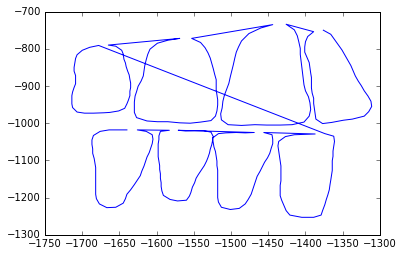

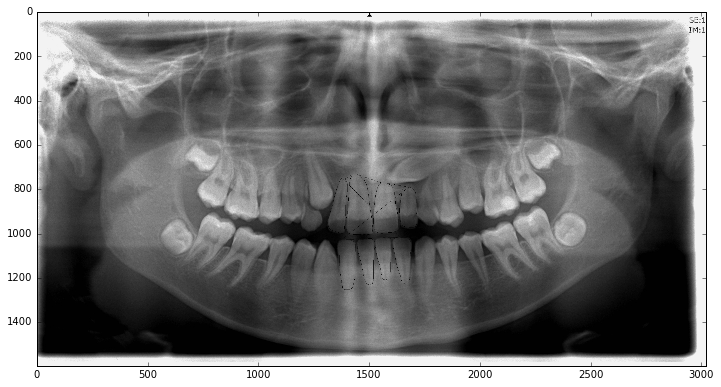

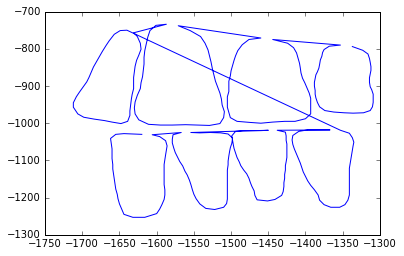

(1597, 3023)


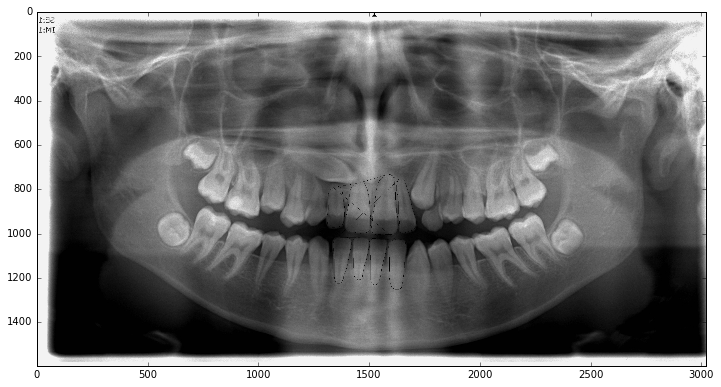

In [3]:
img,mimg = data.get_training_images([0])
l,ml = data.get_training_image_landmarks([0],Dataset.ALL_TEETH)
lc,mlc = data.get_training_image_landmarks([0],Dataset.ALL_TEETH,True)
plot_shapes(lc)
imshow2(overlay_shapes_on_image(img[0],lc))
plot_shapes(mlc)
imshow2(overlay_shapes_on_image(mimg[0],mlc))
print img[0].shape

## Shape Model
All 8 teeth

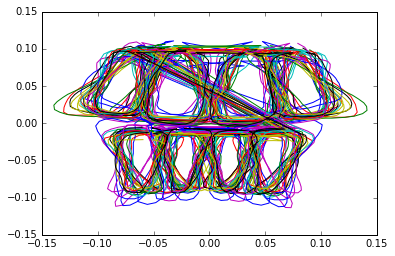

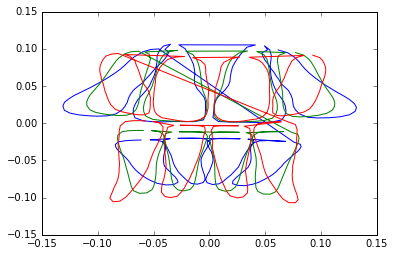

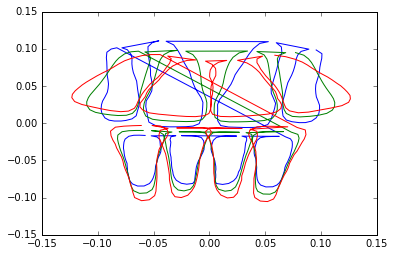

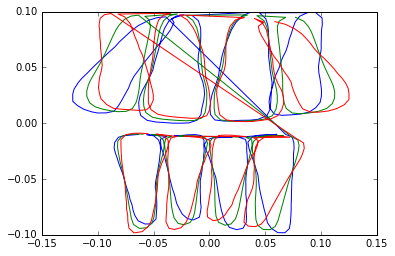

In [4]:
lc,mlc = data.get_training_image_landmarks(Dataset.ALL_TRAINING_IMAGES,Dataset.ALL_TEETH,True)
landmarks = lc + mlc
model = ActiveShapeModel(landmarks)
plot_shapes(model.aligned_shapes())
#plot_shapes([model.mean_shape()])
plot_shapes(model.mode_shapes(1))
plot_shapes(model.mode_shapes(2))
plot_shapes(model.mode_shapes(3))

In [5]:
#sample = cv2.pyrDown(cv2.pyrDown(data.get_extra_images([0])[0]))#[650:1300,1200:1800]
#imshow2(cv2.Laplacian(cv2.bilateralFilter(sample,5,30,30),2))
#imshow2(cv2.morphologyEx(cv2.Canny(cv2.bilateralFilter(sample,9,30,30),20,20),cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))))
#imshow2(cv2.Canny(cv2.bilateralFilter(sample,5,30,30),10,20))

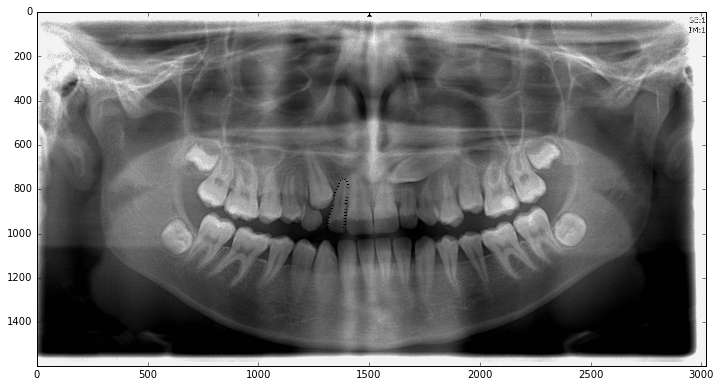

In [6]:
def get_point_normal_pixel_coordinates(shape,point_index,nn,npx):
    point = shape.get_point(point_index)
    neighborhood = shape.get_neighborhood(point_index, nn)
    line = cv2.fitLine(neighborhood, cv2.DIST_L2, 0, 0.01, 0.01);
    slope = line[0:2] / np.sqrt(np.sum(line[0:2] ** 2))
    return [[int(point[1] + (incr * slope[0]) + 0.5), int(point[0] - (incr * slope[1]) + 0.5)] for incr in
            range(-npx, npx + 1)]

img,_ = data.get_training_images([0])
l,_ = data.get_training_image_landmarks([0],[0])
shape = l[0][0]

normal_pixels = []
for i in range(shape.size()):
    normal_pixels += get_point_normal_pixel_coordinates(shape,i,2,5)
imshow2(overlay_points_on_image(img[0],normal_pixels))

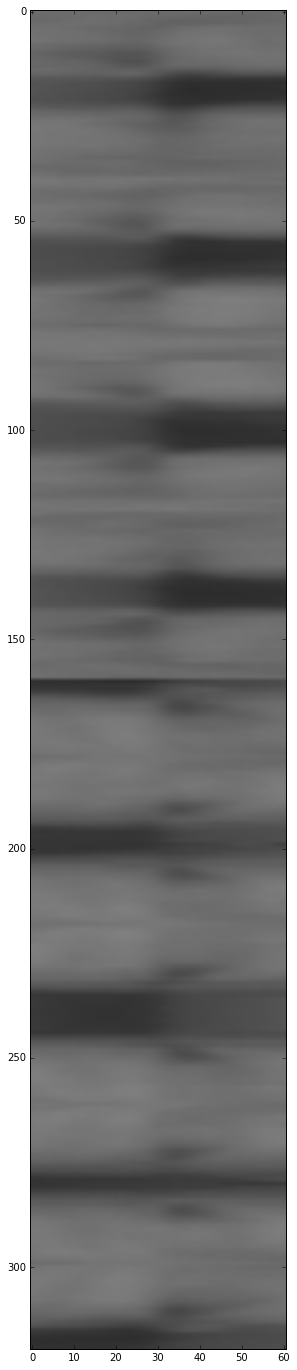

In [7]:
img,mimg = data.get_training_images(Dataset.ALL_TRAINING_IMAGES)
l,ml = data.get_training_image_landmarks(Dataset.ALL_TRAINING_IMAGES,Dataset.ALL_TEETH,combine=True)
images = img + mimg
shapes = l+ml
greymodel = GreyModel(images,shapes,number_of_pixels=30)
img = np.uint8([np.round(greymodel.getModel(point_index).mean()) for point_index in range(greymodel.size())])
imshow2(img,width=24,height=24)

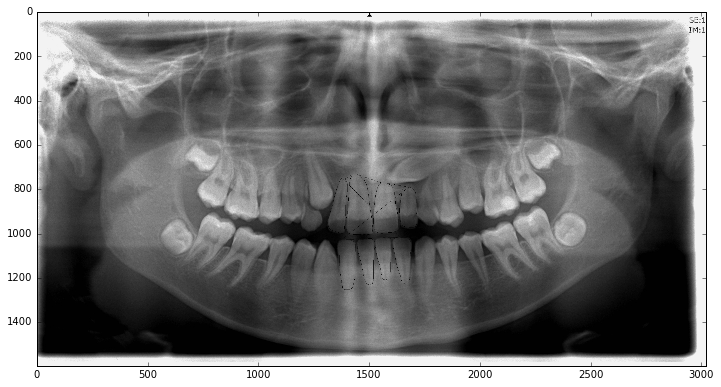

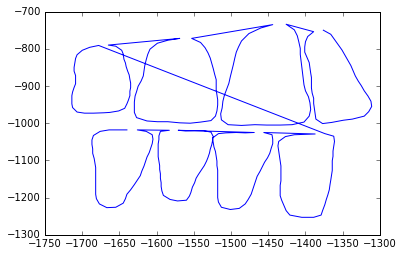

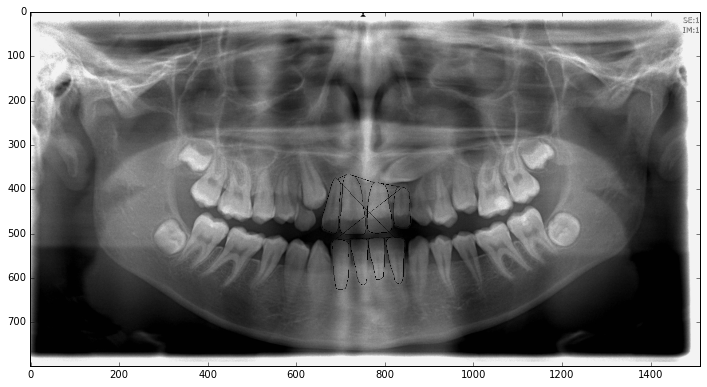

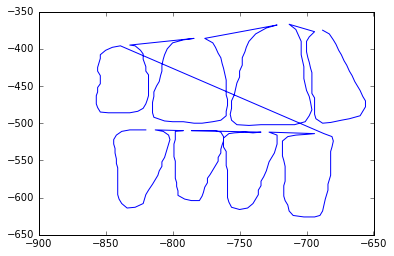

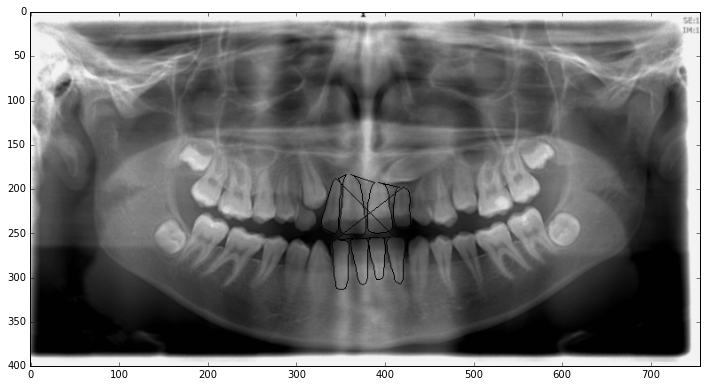

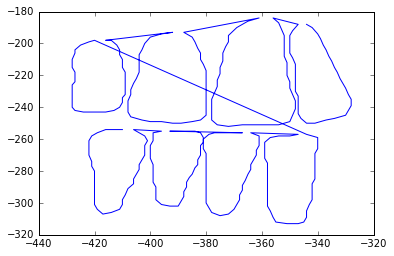

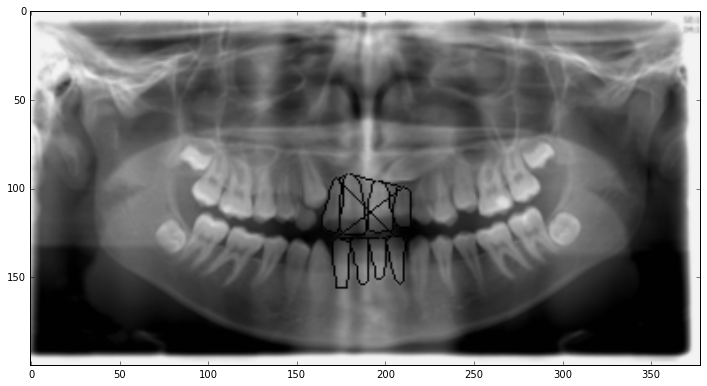

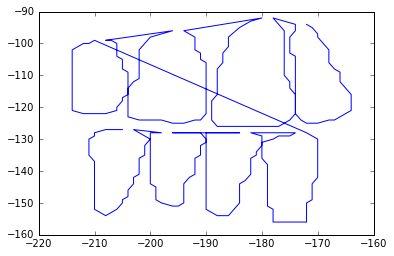

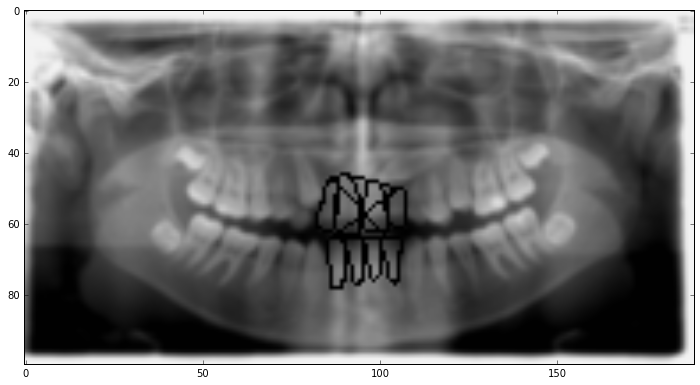

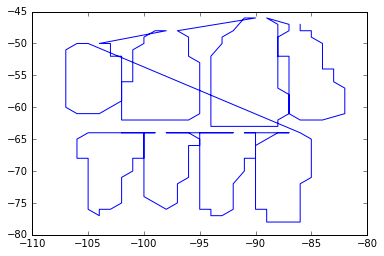

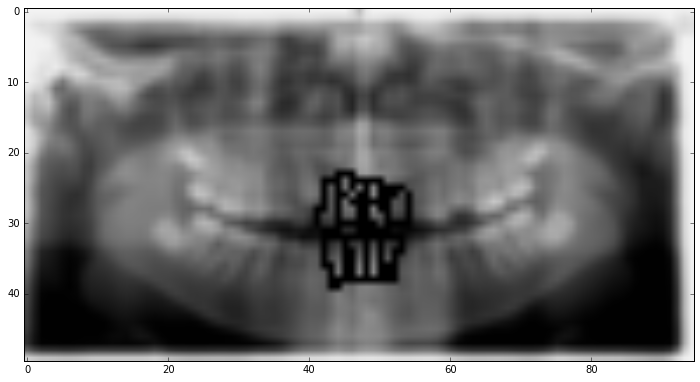

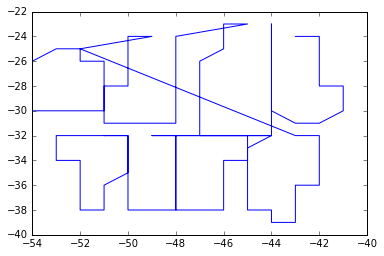

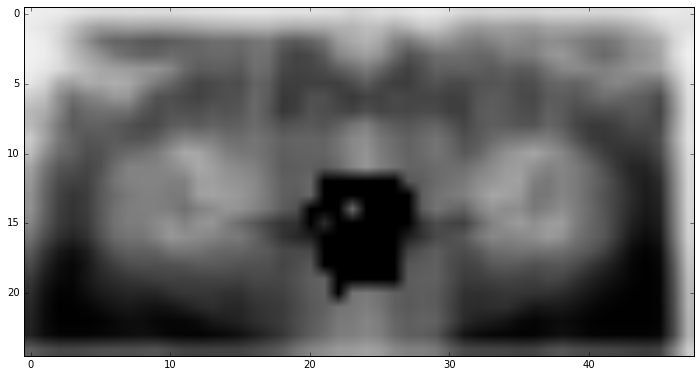

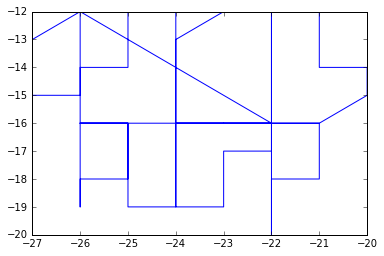

In [10]:
pimg = images[0]
shape = shapes[0]
for i in range(7):
    imshow2(overlay_shapes_on_image(pimg,[shape]))
    plot_shapes([shape])
    pimg = cv2.pyrDown(pimg)
    shape = shape.pyrDown()